In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
cd C:\Users\SATHAKI PROSAD\Desktop

C:\Users\SATHAKI PROSAD\Desktop


In [3]:
med = pd.read_csv('medical.csv')

In [4]:
med

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
med.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
med.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


# EXPLORATORY DATA ANALYSIS

In [7]:
med.shape

(1338, 7)

In [8]:
med.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [9]:
med.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [10]:
med.isnull().sum()# so no null values present in the dataset

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
med.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [12]:
#checking tha value counts of each column
for i in med.columns:
    print(med[i].value_counts())
    print("\n")
# no blanks in any column    


18    69
19    68
51    29
45    29
46    29
47    29
48    29
50    29
52    29
20    29
26    28
54    28
53    28
25    28
24    28
49    28
23    28
22    28
21    28
27    28
28    28
31    27
29    27
30    27
41    27
43    27
44    27
40    27
42    27
57    26
34    26
33    26
32    26
56    26
55    26
59    25
58    25
39    25
38    25
35    25
36    25
37    25
63    23
60    23
61    23
62    23
64    22
Name: age, dtype: int64


male      676
female    662
Name: sex, dtype: int64


32.300    13
28.310     9
31.350     8
30.800     8
30.875     8
          ..
20.100     1
29.545     1
37.900     1
25.520     1
24.090     1
Name: bmi, Length: 548, dtype: int64


0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


no     1064
yes     274
Name: smoker, dtype: int64


southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64


1639.56310     2
8825.08600     1
43254.41795    1
5257.50795     1
1980.07000  

# Univariate Analysis

male      676
female    662
Name: sex, dtype: int64


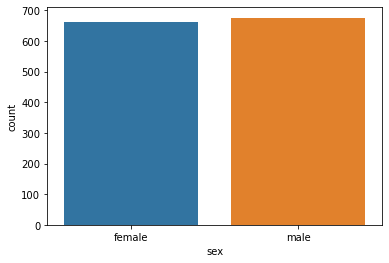

In [13]:
sns.countplot(x="sex",data=med)
print(med["sex"].value_counts())

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64


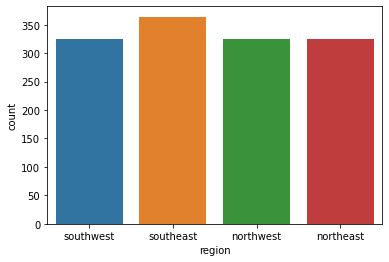

In [14]:
sns.countplot(x="region",data=med)
print(med["region"].value_counts())

<AxesSubplot:ylabel='Frequency'>

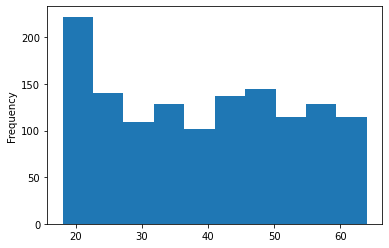

In [15]:
med['age'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

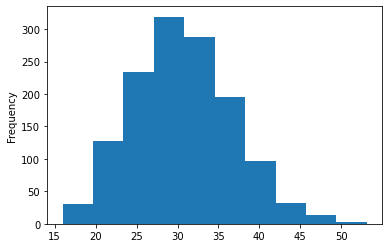

In [16]:
med['bmi'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

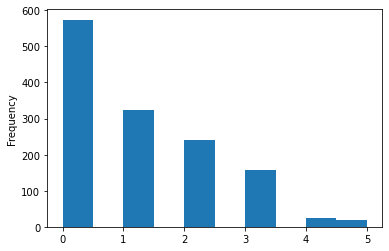

In [17]:
med['children'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

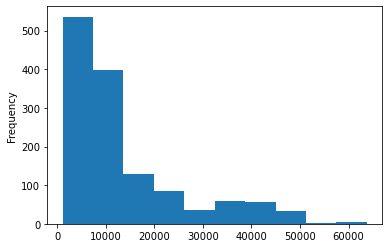

In [18]:
med['charges'].plot.hist()

# Bivariate Analysis

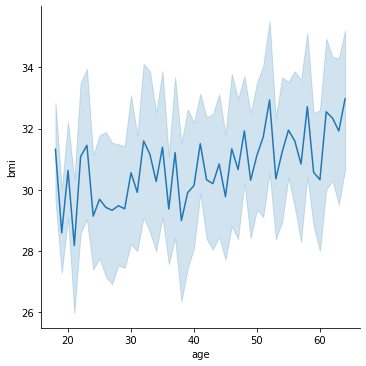

In [19]:
sns.relplot(
    data=med, kind="line",
    x="age", y="bmi")

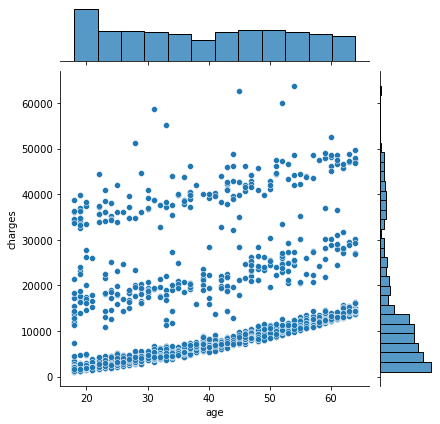

In [20]:
sns.jointplot(data=med, x="age", y="charges")


# Multivariate Analysis

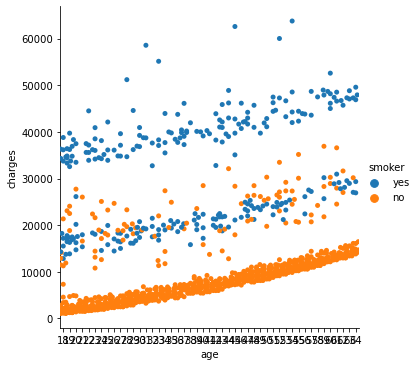

In [21]:
sns.catplot(data=med, kind="swarm", x="age", y="charges", hue="smoker")

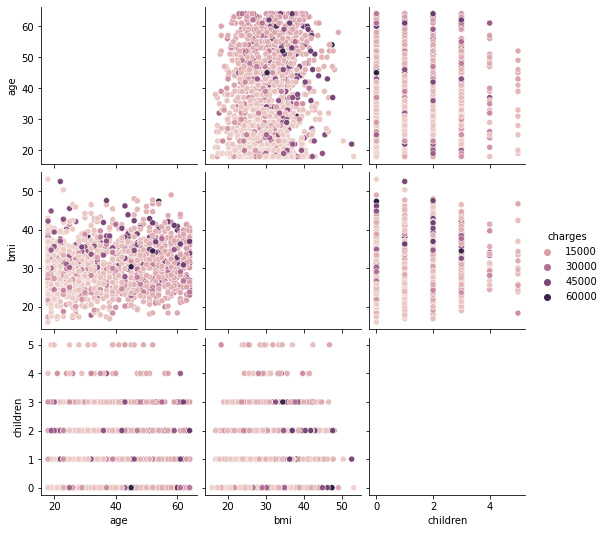

In [22]:
sns.pairplot(data=med, hue="charges")

# LABEL ENCODING TO MAKE CATEGORICAL VARIABLES NUMERIC

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
med["smoker"].unique()

array(['yes', 'no'], dtype=object)

In [25]:
lb=LabelEncoder()

In [26]:
med["smoker"]=lb.fit_transform(med["smoker"])

In [27]:
med["smoker"].value_counts()

0    1064
1     274
Name: smoker, dtype: int64

In [28]:
med["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [29]:
med["region"]=lb.fit_transform(med["region"])

In [30]:
med["region"].value_counts()

2    364
3    325
1    325
0    324
Name: region, dtype: int64

In [31]:
med["sex"]=lb.fit_transform(med["sex"])

In [32]:
med["sex"].value_counts()

1    676
0    662
Name: sex, dtype: int64

In [33]:
med

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [34]:
med.skew()# regions and smoker are categorial so no need to remove skewness,charges are dependent variable so no need to remove
#skewness, children has skewness it should be removed

age         0.055673
sex        -0.020951
bmi         0.284047
children    0.938380
smoker      1.464766
region     -0.038101
charges     1.515880
dtype: float64

In [35]:
med["children"]=np.cbrt(med["children"])

<AxesSubplot:xlabel='children', ylabel='Density'>

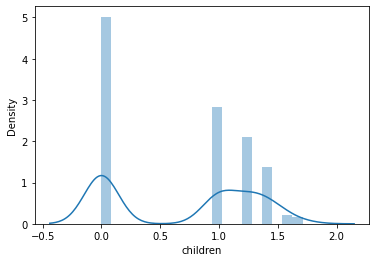

In [36]:
sns.distplot(med["children"],bins=20) 

In [37]:
cor=med.corr()

In [38]:
cor # age and bmi has multicollinerity but bmi is an important parameter so it should not be removed

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.048919,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.016183,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.016515,0.003750,0.157566,0.198341
children,0.048919,0.016183,0.016515,1.000000,0.011829,0.014133,0.072756
smoker,-0.025019,0.076185,0.003750,0.011829,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.014133,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.072756,0.787251,-0.006208,1.000000


In [39]:
from scipy.stats import zscore
z=np.abs(zscore(med))
z

array([[1.43876426, 1.0105187 , 0.45332   , ..., 1.97058663, 1.34390459,
        0.2985838 ],
       [1.50996545, 0.98959079, 0.5096211 , ..., 0.5074631 , 0.43849455,
        0.95368917],
       [0.79795355, 0.98959079, 0.38330685, ..., 0.5074631 , 0.43849455,
        0.72867467],
       ...,
       [1.50996545, 1.0105187 , 1.0148781 , ..., 0.5074631 , 0.43849455,
        0.96159623],
       [1.29636188, 1.0105187 , 0.79781341, ..., 0.5074631 , 1.34390459,
        0.93036151],
       [1.55168573, 1.0105187 , 0.26138796, ..., 1.97058663, 0.46691549,
        1.31105347]])

In [41]:
thershold=3 #above 3 is considered as outliers
print (np.where(z>3))

(array([  34,  116,  543,  577,  819,  847, 1047, 1146, 1230, 1300, 1317],
      dtype=int64), array([6, 2, 6, 6, 6, 2, 2, 6, 6, 6, 2], dtype=int64))


In [42]:
med=med[(z<3).all(axis=1)]

In [44]:
med.shape

(1327, 7)

In [45]:
x = med.drop('charges', axis=1).copy()
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0.00000,1,3
1,18,1,33.770,1.00000,0,2
2,28,1,33.000,1.44225,0,2
3,33,1,22.705,0.00000,0,1
4,32,1,28.880,0.00000,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,1.44225,0,1
1334,18,0,31.920,0.00000,0,0
1335,18,0,36.850,0.00000,0,2
1336,21,0,25.800,0.00000,0,3


In [46]:
y = med['charges'].copy()
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1327, dtype: float64

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [48]:
x_train.shape

(928, 6)

In [49]:
y_train.shape

(928,)

In [50]:
x_test.shape

(399, 6)

In [51]:
y_test.shape

(399,)

In [60]:
lm=LinearRegression()

In [61]:
lm.fit(x_train,y_train)

LinearRegression()

In [62]:
lm.intercept_

-10960.544790582886

In [63]:
lm.coef_

array([  267.88544579,  -408.78617151,   292.22441821,   969.53503968,
       23027.8931731 ,  -432.86973556])

In [64]:
lm.score(x_train,y_train)# model is 75% accurate

0.7521391786543692

In [65]:
#prediting the value
pred=lm.predict(x_test)
print("predicted result price",pred)
print("Actual Price",y_test)

predicted result price [30665.59861942 28104.57212361  6486.43377912 11300.36195506
 23543.85901891   808.72410374 10220.47647151  6244.65479167
  3872.02576069 33124.69589059  5632.19279897 30664.13699128
  5080.54005016  4271.88813222  3773.25750723  3509.96210921
  4176.98352525  5873.73528801  8753.12604726 15709.61803305
  8107.55375466  1856.12579348  6575.6974418  14324.802623
  4410.61772911  1592.80788226  8574.70643522  7723.63930223
  5809.33580691 28392.2077842  11506.05183764 25619.1862279
  9502.62577986 -1792.07321831  5003.6114275   3009.3310717
  9003.50387939 30737.00413925   735.37917249  5103.62952663
 26768.96680703  5836.08452297  9223.06669733 32370.27315159
  6087.87083588  9346.90707635  -273.33467901  4182.00449144
 14311.70128249 15199.19780855 11524.77462192 11612.17026789
 12130.04468508  4594.785719   16935.38809961 36068.39069384
 10380.74807743 31839.31280553 12965.73014865  3323.95967728
 11850.47226464  5382.28176776 12565.23865515  2094.51154385
 3301

In [66]:
print("Error")
print("Mean Absolute Error:",mean_absolute_error(y_test,pred))
print("Mean Squared Error:",mean_squared_error(y_test,pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,pred)))

Error
Mean Absolute Error: 4036.0261142532454
Mean Squared Error: 35352935.87947742
Root Mean Squared Error: 5945.833489047387


In [67]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.7504060494923264


In [ ]:
#this model can be used to predict insurance cost